## Notebook to visualize the viewer functionality


In [5]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "4"

In [6]:
from notebook_imports import *

import time
import torch
from torch.utils.data import DataLoader

from pyrad.data.dataloader import TrainDataloader
from pyrad.data.image_dataset import ImageDataset, PanopticImageDataset
from pyrad.data.image_sampler import CacheImageSampler
from pyrad.data.pixel_sampler import PixelSampler
from pyrad.data.utils import DatasetInputs, get_dataset_inputs_from_dataset_config
from pyrad.graphs.modules.ray_generator import RayGenerator
from pyrad.graphs.modules.scene_colliders import SceneBoundsCollider, AABBBoxCollider
from pyrad.cameras.cameras import get_camera
from pyrad.cameras.rays import RayBundle
from pyrad.utils.io import get_absolute_path
from pyrad.utils.plotly import get_line_segments_from_lines
from pyrad.cameras.cameras import get_camera_model
from pyrad.utils.misc import get_dict_to_torch, instantiate_from_dict_config
from pyrad.engine.trainer import Trainer
from pyrad.utils.config import Config, setup_config

# the new import
from pyrad.viewer.server import viewer_utils


from hydra import compose, initialize
from omegaconf import open_dict
import pprint
from tqdm import tqdm
import random

import numpy as np

import umsgpack
from pyrad.viewer.server.utils import get_chunks, get_intrinsics_matrix_and_camera_to_world_h

from pyrad.viewer.server.visualizer import Viewer

In [7]:
rots = 2.0
N = 30
zrate = 0.5
xs = []
for theta in np.linspace(0.0, 2.0 * np.pi * rots, N + 1)[:-1]:
    x = np.array([np.cos(theta), -np.sin(theta), -np.sin(theta * zrate)])
    xs.append(x)
xs = np.array(xs)
x, y, z = xs[:, 0], xs[:, 1], xs[:, 2]

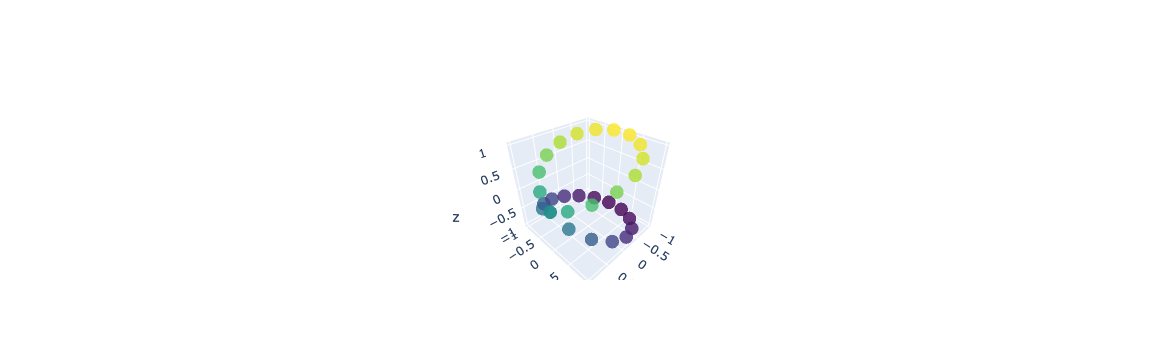

In [8]:
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=x,
            y=y,
            z=z,
            mode="markers",
            marker=dict(
                size=8,
                color=z,  # set color to an array/list of desired values
                colorscale="Viridis",  # choose a colorscale
                opacity=0.8,
            ),
        )
    ]
)
fig.show()

In [9]:
from pyrad.cameras.cameras import SimplePinholeCamera
from pyrad.cameras.camera_paths import get_spiral_path

In [10]:
cx = 2
cy = 2
f = 10
camera = SimplePinholeCamera(cx, cy, f)

In [12]:
# camera_path = get_spiral_path(camera)

In [13]:
from pyrad.viewer.server import viewer_utils
from pyrad.viewer.server.visualizer import Viewer

In [14]:
vis = Viewer(zmq_url="tcp://127.0.0.1:6000")


In [63]:
for cam in camera_path.cameras:
    # print(cam.camera_to_world)
    viewer_utils.set_camera(vis, camera)
    time.sleep(0.1)

In [ ]:
viewer_utils.set_camera(vis, camera)